In [3]:
from datascience import *
import numpy as np

In [4]:
def double(x):
    """ Double x """
    return 2*x

In [5]:
double(4)

8

In [6]:
from datascience import *
double(make_array(3,4,5))

array([ 6,  8, 10])

In [7]:
from datascience import *
make_array(3,4,5)

array([3, 4, 5])

In [8]:
def percent(x,total):
    """
    Convert first argument (x) to a percentage of second argument (total). This function divides x by total and multiplies the result by 100 and rounds the results by 2 decimal places. """
    return round((x/total)*100, 2)

In [9]:
percent(4, 16)

25.0

In [10]:
def percents(counts):
    """Convert the values of array argument to percents out of total of array argument """
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [11]:
percents(make_array(7,10,4))

array([33.33, 47.62, 19.05])

In [12]:
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between to adjacent elements of array_x"""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return max(absolute_diffs)

some_numbers = make_array(2, 4, 5, 6, 4, -1, 1)
big_diff = biggest_difference(some_numbers)
print("The biggest difference is ", big_diff)

The biggest difference is  5


In [13]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [14]:
ages = Table().with_columns(
    "Person", make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


In [15]:
ages.apply(cut_off_at_100,'Age')

array([ 17, 100,  52, 100,   6, 100])

In [16]:
ages.with_column('Cut off Age', ages.apply(cut_off_at_100, 'Age'))

Person,Age,Cut off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


In [17]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [18]:
galton = Table.read_table('../data/inferentialthinking/data/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [19]:
heights = galton.select(3,7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


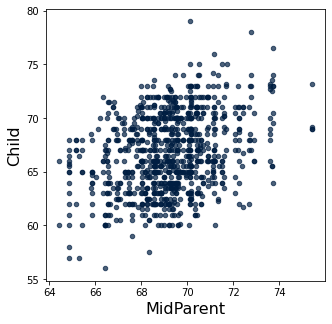

In [20]:
heights.scatter(0)

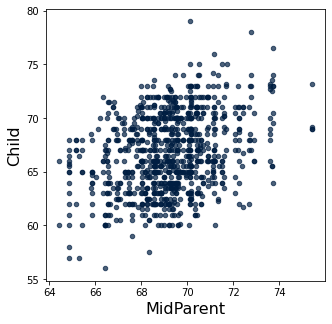

In [25]:
heights.scatter('MidParent')


In [26]:
def predict_child(mpht):
    """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht plus or minus 0.5.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()

In [27]:
predict_child(68)

66.24045801526718

In [28]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

In [29]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


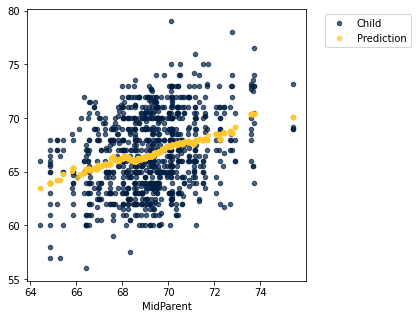

In [30]:
heights_with_predictions.scatter('MidParent')